In [34]:
import json
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [35]:
results_json = 'results_10_8_10_diff_problem.json'

with open(results_json, 'r') as json_file:
    results = json.load(json_file)

print(results)
print(len(results))

[{'parameters': {'literals_count': '20', 'clauses_count': '91', 'iteration': '1', 'problem_num': '011', 'qubo_formulation_time': '4.494788885116577', 'model_formulation_time': '0.005995273590087891'}, 'iteration_results': [{'solver': 'FixStars1s', 'results': {'max_clauses_satisfied_Obj': '91.0000000000000', 'max_clauses_satisfied_Verified': '91', 'execution_time': '0.0608', 'total_time': '1.9343252182006836'}}, {'solver': 'FixStars10s', 'results': {'max_clauses_satisfied_Obj': '91.0000000000000', 'max_clauses_satisfied_Verified': '91', 'execution_time': '0.060653', 'total_time': '10.891014814376831'}}, {'solver': 'FixStars100s', 'results': {'max_clauses_satisfied_Obj': '91.0000000000000', 'max_clauses_satisfied_Verified': '91', 'execution_time': '0.060738', 'total_time': '100.88001132011414'}}, {'solver': 'Gurobi10s', 'results': {'max_clauses_satisfied_Obj': '91.0000000000000', 'max_clauses_satisfied_Verified': '91', 'execution_time': '0.236', 'total_time': '0.24399685859680176'}}, {'s

In [36]:
benchmarkSets_literals_count = [20, 50, 75, 100, 125, 150, 175, 200, 225, 250]
benchmarkSets_clauses_count = [91, 218, 325, 430, 538, 645, 753, 860, 960, 1065]
solvers_name = ["FixStars1s", "FixStars10s", "FixStars100s", "Gurobi10s", "Gurobi100s", "Gurobi150s", "DWave4.1", "DWave6.4"]
QUBO_size = np.array(benchmarkSets_clauses_count) + np.array(benchmarkSets_literals_count)
print("QUBO_size:", QUBO_size)

QUBO_size: [ 111  268  400  530  663  795  928 1060 1185 1315]


In [37]:
for benchmarkSet in results:
    print(benchmarkSet["parameters"])
    print(benchmarkSet["iteration_results"])
    print("\n")


{'literals_count': '20', 'clauses_count': '91', 'iteration': '1', 'problem_num': '011', 'qubo_formulation_time': '4.494788885116577', 'model_formulation_time': '0.005995273590087891'}
[{'solver': 'FixStars1s', 'results': {'max_clauses_satisfied_Obj': '91.0000000000000', 'max_clauses_satisfied_Verified': '91', 'execution_time': '0.0608', 'total_time': '1.9343252182006836'}}, {'solver': 'FixStars10s', 'results': {'max_clauses_satisfied_Obj': '91.0000000000000', 'max_clauses_satisfied_Verified': '91', 'execution_time': '0.060653', 'total_time': '10.891014814376831'}}, {'solver': 'FixStars100s', 'results': {'max_clauses_satisfied_Obj': '91.0000000000000', 'max_clauses_satisfied_Verified': '91', 'execution_time': '0.060738', 'total_time': '100.88001132011414'}}, {'solver': 'Gurobi10s', 'results': {'max_clauses_satisfied_Obj': '91.0000000000000', 'max_clauses_satisfied_Verified': '91', 'execution_time': '0.236', 'total_time': '0.24399685859680176'}}, {'solver': 'Gurobi100s', 'results': {'max

In [38]:
counter = 1
qubo_formulation_time_all = []
for benchmarkSet in results:
    if counter == 1:
        qubo_formulation_time_problem = []
    if counter <= 10:
        qubo_formulation_time_problem.append(float(benchmarkSet["parameters"]["qubo_formulation_time"]))
        counter += 1
    if counter == 11:
        qubo_formulation_time_all.append(qubo_formulation_time_problem)
        counter = 1

for each in qubo_formulation_time_all:
    print(each)

[4.494788885116577, 3.9657368659973145, 3.8095309734344482, 3.8768062591552734, 3.949455499649048, 4.2892255783081055, 4.38385796546936, 4.550721883773804, 3.815286159515381, 4.025935411453247]
[14.653083801269531, 14.540673732757568, 15.456547260284424, 14.76089096069336, 14.763257026672363, 14.732044219970703, 14.751375436782837, 13.993888139724731, 15.07455039024353, 15.31977653503418]
[25.76082944869995, 25.659871578216553, 24.428603410720825, 24.52839970588684, 24.54940152168274, 24.71970796585083, 24.608983516693115, 25.01060461997986, 25.099603414535522, 25.070920944213867]
[38.697263956069946, 38.38931965827942, 36.07684326171875, 39.2877562046051, 38.997514486312866, 36.40527629852295, 39.138381242752075, 36.50629806518555, 39.06793665885925, 39.28196334838867]
[51.55128455162048, 51.72112703323364, 51.61850690841675, 51.234516859054565, 51.25621271133423, 51.0215950012207, 51.15860199928284, 51.51968312263489, 51.6077618598938, 51.091490030288696]
[64.77609968185425, 67.46931

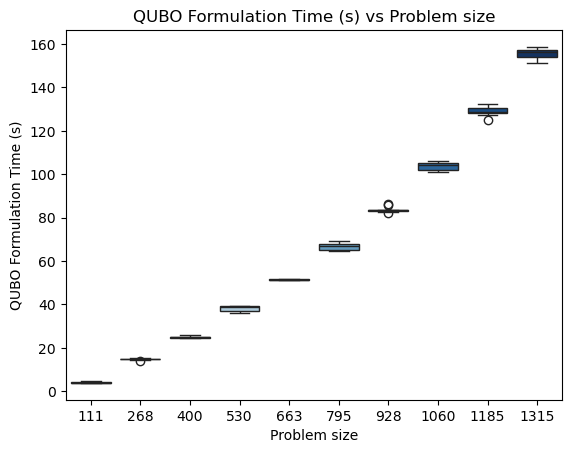

In [39]:
# Data
values = qubo_formulation_time_all
x_labels = QUBO_size

# Flatten the data
y = [val for group in values for val in group]
x = [label for label, group in zip(x_labels, values) for _ in group]

# Plot
sns.boxplot(x=x, y=y, hue=x, palette="Blues", legend=False)

# Labels and title
plt.xlabel("Problem size")
plt.ylabel("QUBO Formulation Time (s)")
plt.title("QUBO Formulation Time (s) vs Problem size")
plt.show()

In [40]:
counter = 1
model_formulation_time_all = []
for benchmarkSet in results:
    if counter == 1:
        model_formulation_time_problem = []
    if counter <= 10:
        model_formulation_time_problem.append(float(benchmarkSet["parameters"]["model_formulation_time"]))
        counter += 1
    if counter == 11:
        model_formulation_time_all.append(model_formulation_time_problem)
        counter = 1

for each in model_formulation_time_all:
    print(each)

[0.005995273590087891, 0.006004810333251953, 0.004999399185180664, 0.006001710891723633, 0.0059893131256103516, 0.00599980354309082, 0.006002902984619141, 0.005999565124511719, 0.005998849868774414, 0.005998373031616211]
[0.03396463394165039, 0.03399300575256348, 0.03403615951538086, 0.03403902053833008, 0.03400135040283203, 0.03303337097167969, 0.03298020362854004, 0.034967899322509766, 0.03399348258972168, 0.034966230392456055]
[0.07696318626403809, 0.07596421241760254, 0.07496809959411621, 0.07799744606018066, 0.0759885311126709, 0.07699990272521973, 0.07799959182739258, 0.07600021362304688, 0.07603311538696289, 0.07599759101867676]
[0.13500428199768066, 0.13500189781188965, 0.1360032558441162, 0.136962890625, 0.13796424865722656, 0.1329951286315918, 0.13896656036376953, 0.13503527641296387, 0.1329963207244873, 0.13499855995178223]
[0.21437978744506836, 0.21196436882019043, 0.2109668254852295, 0.21166110038757324, 0.20803308486938477, 0.21203279495239258, 0.20900797843933105, 0.2159

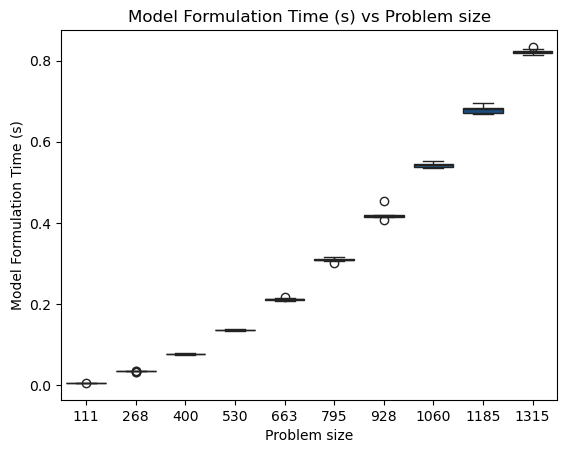

In [41]:
# Data
values = model_formulation_time_all
x_labels = QUBO_size

# Flatten the data
y = [val for group in values for val in group]
x = [label for label, group in zip(x_labels, values) for _ in group]

# Plot
sns.boxplot(x=x, y=y, hue=x, palette="Blues", legend=False)

# Labels and title
plt.xlabel("Problem size")
plt.ylabel("Model Formulation Time (s)")
plt.title("Model Formulation Time (s) vs Problem size")
plt.show()

In [42]:
solver_result_all_time = []
solver_result_all_verified = []
solver_result_all_obj = []

for name in solvers_name:
    list_of_ten = [[] for _ in range(10)]
    solver_result_all_time.append(list_of_ten)
    list_of_ten = [[] for _ in range(10)]
    solver_result_all_verified.append(list_of_ten)
    list_of_ten = [[] for _ in range(10)]
    solver_result_all_obj.append(list_of_ten)

prob_counter = 0
solver_num = 0
iteration = 1
for benchmarkSet in results:
    for solver_result in benchmarkSet["iteration_results"]:
        try:
            execution_time = float(solver_result["results"]["execution_time"])
            max_clauses_satisfied_Verified = float(solver_result["results"]["max_clauses_satisfied_Verified"])
            max_clauses_satisfied_Obj = float(solver_result["results"]["max_clauses_satisfied_Obj"])
        except:
            execution_time = 0
            max_clauses_satisfied_Verified = 0
            max_clauses_satisfied_Obj = 0
        solver_result_all_time[solver_num][prob_counter].append(execution_time)
        solver_result_all_verified[solver_num][prob_counter].append(max_clauses_satisfied_Verified / benchmarkSets_clauses_count[prob_counter])
        solver_result_all_obj[solver_num][prob_counter].append(max_clauses_satisfied_Obj / benchmarkSets_clauses_count[prob_counter])

        solver_num += 1
    solver_num = 0
    iteration += 1
    if (iteration == 11):
        prob_counter += 1
        iteration = 1


In [43]:
# Cut out errors (All 0s)
for solver in solver_result_all_time:
    solver[:] = [prob for prob in solver if sum(prob) != 0]
for solver in solver_result_all_verified:
    solver[:] = [prob for prob in solver if sum(prob) != 0]
for solver in solver_result_all_obj:
    solver[:] = [prob for prob in solver if sum(prob) != 0]

In [44]:
# Cut outlier
solver_result_all_time[7] = solver_result_all_time[7][:2]
solver_result_all_verified[7] = solver_result_all_verified[7][:2]
solver_result_all_obj[7] = solver_result_all_obj[7][:2]

In [45]:
for solver in range(8):
    print(solver_result_all_time[solver])
print("=============================================================")
for solver in range(8):
    print(solver_result_all_verified[solver])
print("=============================================================")
for solver in range(8):
    print(solver_result_all_obj[solver])

[[0.0608, 0.060395, 0.070099, 0.060201, 0.060281, 0.069927, 0.060595, 0.060796, 0.061308, 0.060472], [0.059486, 0.209645, 0.129744, 0.059995, 0.05938, 0.068333, 0.059277, 0.068786, 0.059764, 0.129641], [0.188817, 0.05326, 0.510175, 0.189798, 0.053581, 0.053628, 0.30039, 0.053341, 0.053804, 0.13533], [0.276735, 0.190976, 0.485674, 0.193169, 0.279091, 0.276447, 0.062757, 0.063202, 0.192509, 0.190591], [0.991995, 0.228185, 0.445053, 0.439428, 0.325317, 0.364978, 0.22848, 0.900057, 0.353624, 0.326493], [0.538505, 0.773396, 0.986653, 0.820964, 0.516936, 0.496884, 0.307824, 0.77307, 0.628888, 0.19613], [0.220383, 0.346733, 0.318061, 0.222266, 0.551729, 0.31496, 0.315406, 0.705963, 0.554479, 0.562198], [0.969698, 0.618596, 0.606137, 0.50286, 0.474781, 0.621738, 0.357199, 0.356726, 0.639575, 0.63826], [0.623829, 0.495483, 0.794363, 0.617371, 0.67129, 0.970964, 0.483204, 0.515161, 0.359115, 0.968884], [0.984191, 0.251983, 0.831867, 1.000983, 0.633511, 0.252085, 0.792222, 0.782028, 0.994971, 0.8

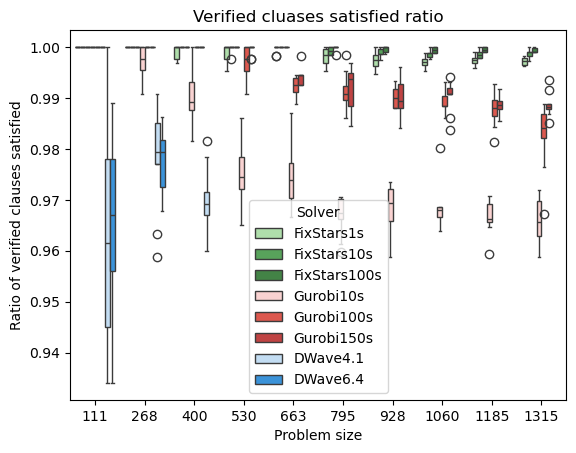

In [46]:
# Data
FixStars1s = solver_result_all_verified[0]
FixStars10s = solver_result_all_verified[1]
FixStars100s = solver_result_all_verified[2]
Gurobi10s = solver_result_all_verified[3]
Gurobi100s = solver_result_all_verified[4]
Gurobi150s = solver_result_all_verified[5]
DWave41 = solver_result_all_verified[6]
DWave64 = solver_result_all_verified[7]
x_labels = QUBO_size

# Flatten the data
x = ([label for label, group in zip(x_labels, FixStars1s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars10s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi10s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi150s) for _ in group] +
     [label for label, group in zip(x_labels, DWave41) for _ in group] +
     [label for label, group in zip(x_labels, DWave64) for _ in group])
y = ([val for group in FixStars1s for val in group] + 
     [val for group in FixStars10s for val in group] + 
     [val for group in FixStars100s for val in group] + 
     [val for group in Gurobi10s for val in group] + 
     [val for group in Gurobi100s for val in group] + 
     [val for group in Gurobi150s for val in group] + 
     [val for group in DWave41 for val in group] + 
     [val for group in DWave64 for val in group])
solver = (["FixStars1s"] * sum(len(group) for group in FixStars1s) +
          ["FixStars10s"] * sum(len(group) for group in FixStars10s) +
          ["FixStars100s"] * sum(len(group) for group in FixStars100s) +
          ["Gurobi10s"] * sum(len(group) for group in Gurobi10s) +
          ["Gurobi100s"] * sum(len(group) for group in Gurobi100s) +
          ["Gurobi150s"] * sum(len(group) for group in Gurobi150s) +
          ["DWave4.1"] * sum(len(group) for group in DWave41) +
          ["DWave6.4"] * sum(len(group) for group in DWave64))

# Plot
custom_palette = [
    "#A8E6A3",  # Light Green
    "#4CAF50",   # Green
    "#388E3C",   # Dark Green
    "#FFCCCB",   # Light Red
    "#F44336",   # Red
    "#D32F2F",   # Dark Red
    "#BBDEFB",   # Light Blue
    "#2196F3"    # Blue
]
sns.boxplot(x=x, y=y, hue=solver, palette=custom_palette)

# Labels and title
plt.xlabel("Problem size")
plt.ylabel("Ratio of verified clauses satisfied")
plt.title("Verified cluases satisfied ratio")
plt.legend(title="Solver")
plt.show()


USe fixstars1s, fixstar10s, gurobi10s, gurobi100s end at 663 range 20 40 70 

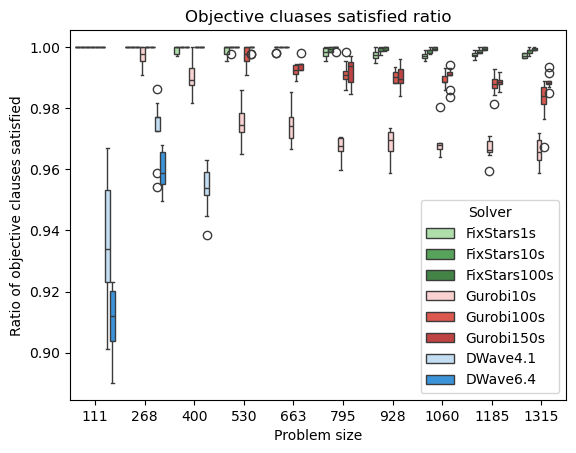

In [47]:
# Data
FixStars1s = solver_result_all_obj[0]
FixStars10s = solver_result_all_obj[1]
FixStars100s = solver_result_all_obj[2]
Gurobi10s = solver_result_all_obj[3]
Gurobi100s = solver_result_all_obj[4]
Gurobi150s = solver_result_all_obj[5]
DWave41 = solver_result_all_obj[6]
DWave64 = solver_result_all_obj[7]
x_labels = QUBO_size

# Flatten the data
x = ([label for label, group in zip(x_labels, FixStars1s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars10s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi10s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi150s) for _ in group] +
     [label for label, group in zip(x_labels, DWave41) for _ in group] +
     [label for label, group in zip(x_labels, DWave64) for _ in group])
y = ([val for group in FixStars1s for val in group] + 
     [val for group in FixStars10s for val in group] + 
     [val for group in FixStars100s for val in group] + 
     [val for group in Gurobi10s for val in group] + 
     [val for group in Gurobi100s for val in group] + 
     [val for group in Gurobi150s for val in group] + 
     [val for group in DWave41 for val in group] + 
     [val for group in DWave64 for val in group])
solver = (["FixStars1s"] * sum(len(group) for group in FixStars1s) +
          ["FixStars10s"] * sum(len(group) for group in FixStars10s) +
          ["FixStars100s"] * sum(len(group) for group in FixStars100s) +
          ["Gurobi10s"] * sum(len(group) for group in Gurobi10s) +
          ["Gurobi100s"] * sum(len(group) for group in Gurobi100s) +
          ["Gurobi150s"] * sum(len(group) for group in Gurobi150s) +
          ["DWave4.1"] * sum(len(group) for group in DWave41) +
          ["DWave6.4"] * sum(len(group) for group in DWave64))

# Plot
custom_palette = [
    "#A8E6A3",  # Light Green
    "#4CAF50",   # Green
    "#388E3C",   # Dark Green
    "#FFCCCB",   # Light Red
    "#F44336",   # Red
    "#D32F2F",   # Dark Red
    "#BBDEFB",   # Light Blue
    "#2196F3"    # Blue
]
sns.boxplot(x=x, y=y, hue=solver, palette=custom_palette)

# Labels and title
plt.xlabel("Problem size")
plt.ylabel("Ratio of objective clauses satisfied")
plt.title("Objective cluases satisfied ratio")
plt.legend(title="Solver")
plt.show()


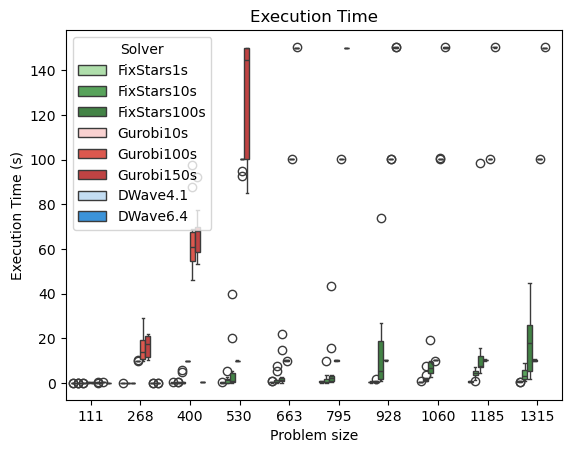

In [48]:
# Data
FixStars1s = solver_result_all_time[0]
FixStars10s = solver_result_all_time[1]
FixStars100s = solver_result_all_time[2]
Gurobi10s = solver_result_all_time[3]
Gurobi100s = solver_result_all_time[4]
Gurobi150s = solver_result_all_time[5]
DWave41 = solver_result_all_time[6]
DWave64 = solver_result_all_time[7]
x_labels = QUBO_size

# Flatten the data
x = ([label for label, group in zip(x_labels, FixStars1s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars10s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi10s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi150s) for _ in group] +
     [label for label, group in zip(x_labels, DWave41) for _ in group] +
     [label for label, group in zip(x_labels, DWave64) for _ in group])
y = ([val for group in FixStars1s for val in group] + 
     [val for group in FixStars10s for val in group] + 
     [val for group in FixStars100s for val in group] + 
     [val for group in Gurobi10s for val in group] + 
     [val for group in Gurobi100s for val in group] + 
     [val for group in Gurobi150s for val in group] + 
     [val for group in DWave41 for val in group] + 
     [val for group in DWave64 for val in group])
solver = (["FixStars1s"] * sum(len(group) for group in FixStars1s) +
          ["FixStars10s"] * sum(len(group) for group in FixStars10s) +
          ["FixStars100s"] * sum(len(group) for group in FixStars100s) +
          ["Gurobi10s"] * sum(len(group) for group in Gurobi10s) +
          ["Gurobi100s"] * sum(len(group) for group in Gurobi100s) +
          ["Gurobi150s"] * sum(len(group) for group in Gurobi150s) +
          ["DWave4.1"] * sum(len(group) for group in DWave41) +
          ["DWave6.4"] * sum(len(group) for group in DWave64))

# Plot
custom_palette = [
    "#A8E6A3",  # Light Green
    "#4CAF50",   # Green
    "#388E3C",   # Dark Green
    "#FFCCCB",   # Light Red
    "#F44336",   # Red
    "#D32F2F",   # Dark Red
    "#BBDEFB",   # Light Blue
    "#2196F3"    # Blue
]
sns.boxplot(x=x, y=y, hue=solver, palette=custom_palette)

# Labels and title
plt.xlabel("Problem size")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time")
plt.legend(title="Solver")
plt.show()

time avg